In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("/content/loan_prediction data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
cat_columns=df.select_dtypes(include='object').columns
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [9]:
num_columns=df.select_dtypes(include='number').columns
num_columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
for col in num_columns:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-149112978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [12]:
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2123242297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [14]:
#feature selection
df.drop('Loan_ID', axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 12)

In [16]:
df.duplicated().sum()

np.int64(0)

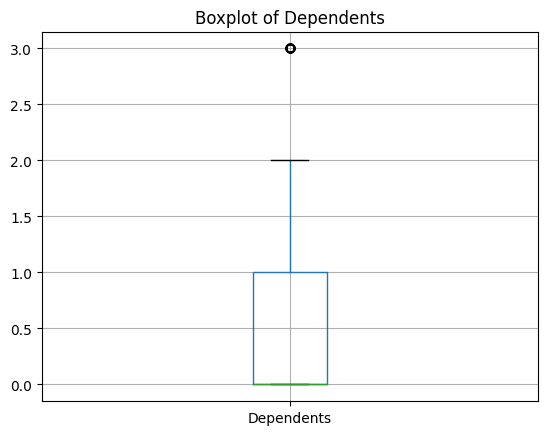

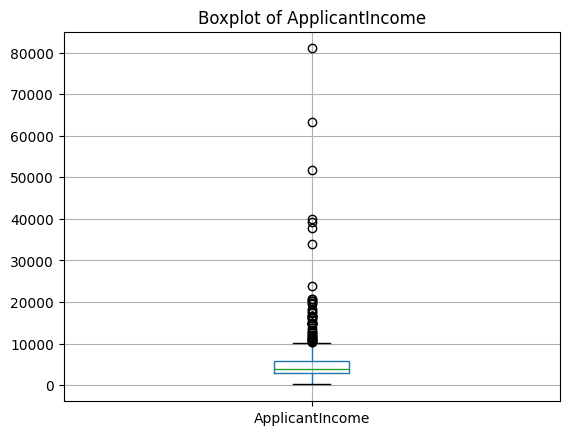

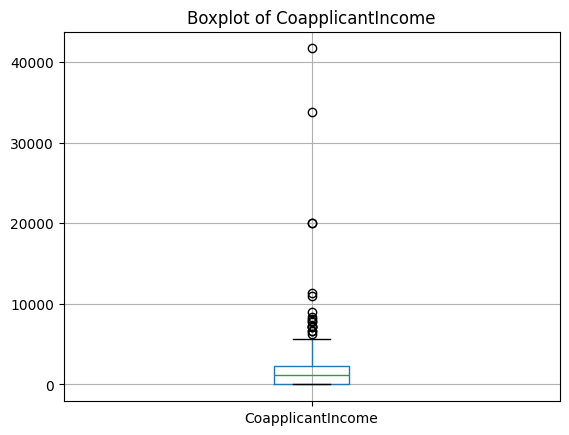

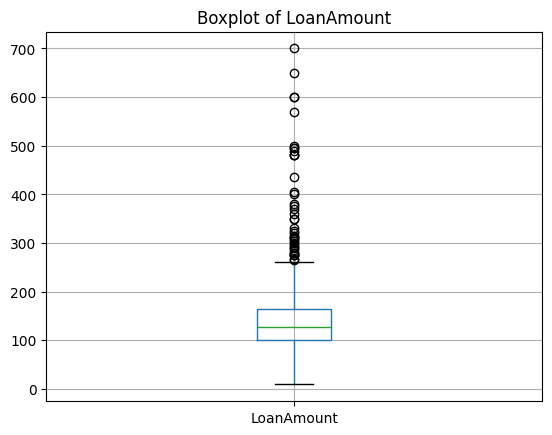

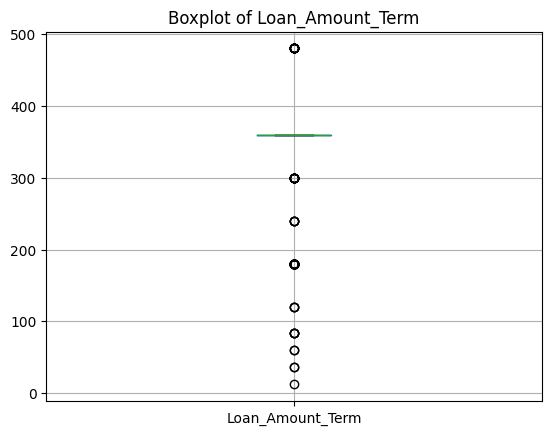

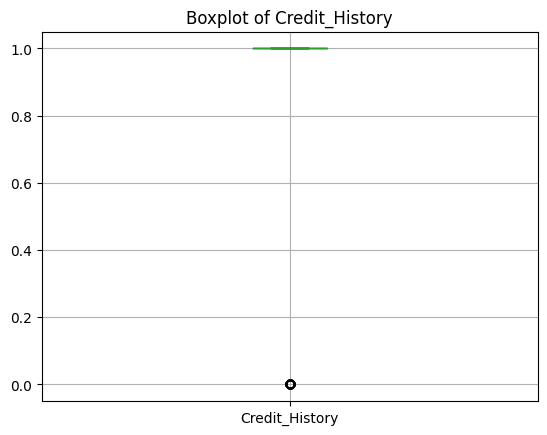

In [17]:
#boxplot before removing outliers
for col in num_columns:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [18]:
#Handling outliers
for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed successfully!")
df.shape

Outliers removed successfully!


(360, 12)

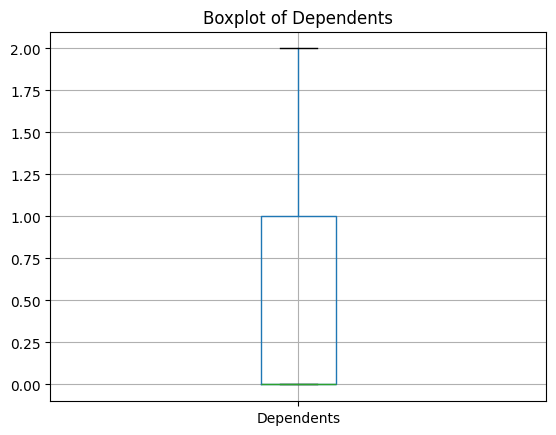

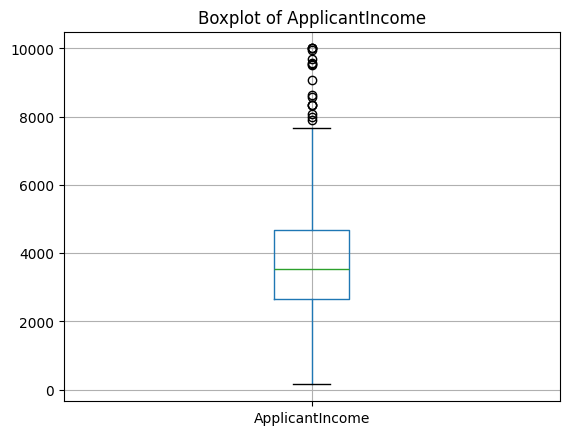

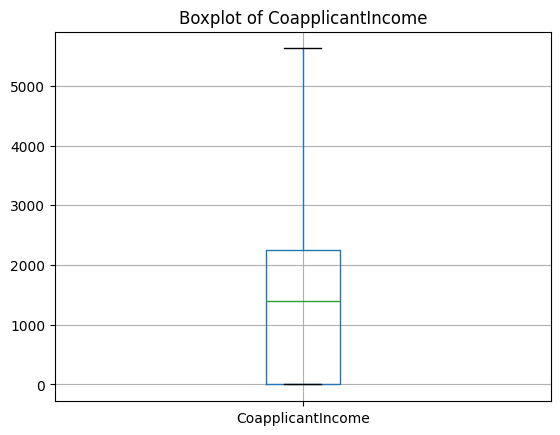

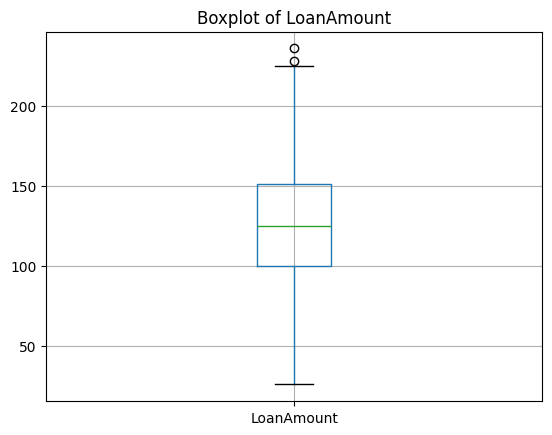

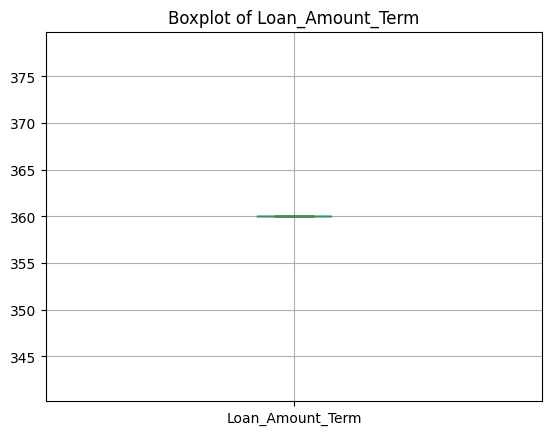

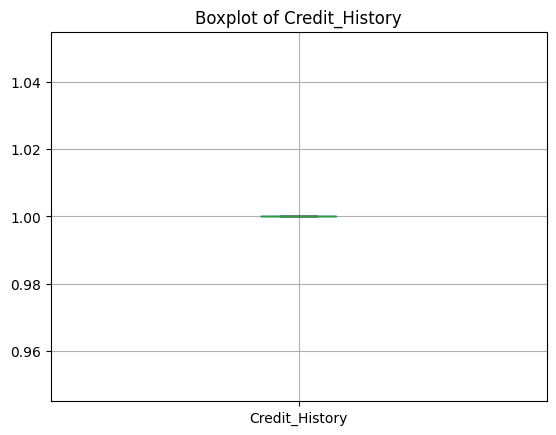

In [19]:
# Boxplot After removing outliers
for col in num_columns:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [20]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [21]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [22]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shapes -> X_train:', X_train.shape, 'X_test:', X_test.shape)

Shapes -> X_train: (288, 11) X_test: (72, 11)


In [23]:
#Logistic Regression
LR = LogisticRegression(max_iter=1000, random_state=42)
LR.fit(X_train, y_train)
lr_pred=LR.predict(X_test)


acc_lr = accuracy_score(y_test,lr_pred)


In [24]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_test, knn_pred)


In [25]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test, dt_pred)


In [26]:
#SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

acc_svm = accuracy_score(y_test, svm_pred)


In [27]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, rf_pred)


In [28]:

print("Model Comparison:")
print("-----------------")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"KNN Accuracy                : {acc_knn:.4f}")
print(f"Decision Tree Accuracy      : {acc_dt:.4f}")
print(f"SVM Accuracy                : {acc_svm:.4f}")
print(f"Random Forest               : {acc_rf:.4f}")

Model Comparison:
-----------------
Logistic Regression Accuracy: 0.8750
KNN Accuracy                : 0.8472
Decision Tree Accuracy      : 0.8194
SVM Accuracy                : 0.8750
Random Forest               : 0.8472



==================== Logistic Regression ====================


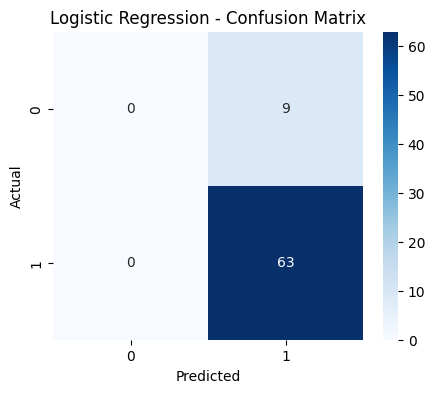


==================== SVM ====================


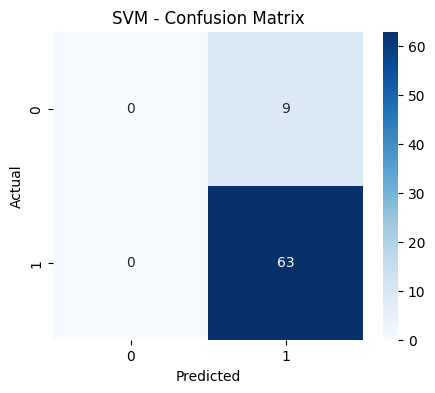


==================== Random Forest ====================


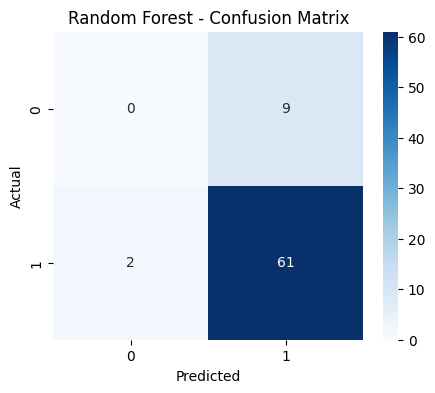


==================== Decision Tree ====================


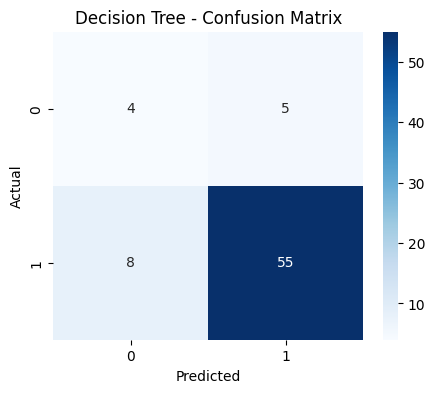


==================== KNN ====================


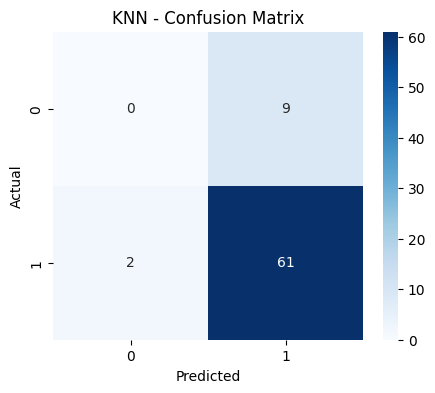



=== Comparison Table ===
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.875000   0.875000  1.000000  0.933333
1                  SVM  0.875000   0.875000  1.000000  0.933333
2        Random Forest  0.847222   0.871429  0.968254  0.917293
3        Decision Tree  0.819444   0.916667  0.873016  0.894309
4                  KNN  0.847222   0.871429  0.968254  0.917293


In [29]:
models = {
    "Logistic Regression": LR,
    "SVM": svm,
    "Random Forest": rf,
    "Decision Tree": dt,
    "KNN": knn
}

# To store metrics
results = []

for name, model in models.items():
    print(f"\n==================== {name} ====================")

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Save results
    results.append([name, acc, pre, rec, f1])


    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Show comparison table
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n\n=== Comparison Table ===")
print(results_df)


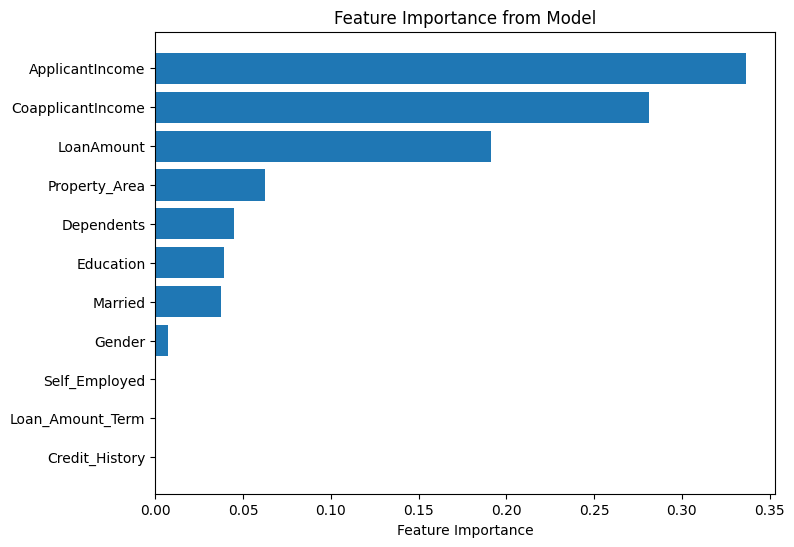

In [30]:
# Feature importance
model = dt
importances = model.feature_importances_
feature_names = X_train.columns
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Model")
plt.gca().invert_yaxis()
plt.show()

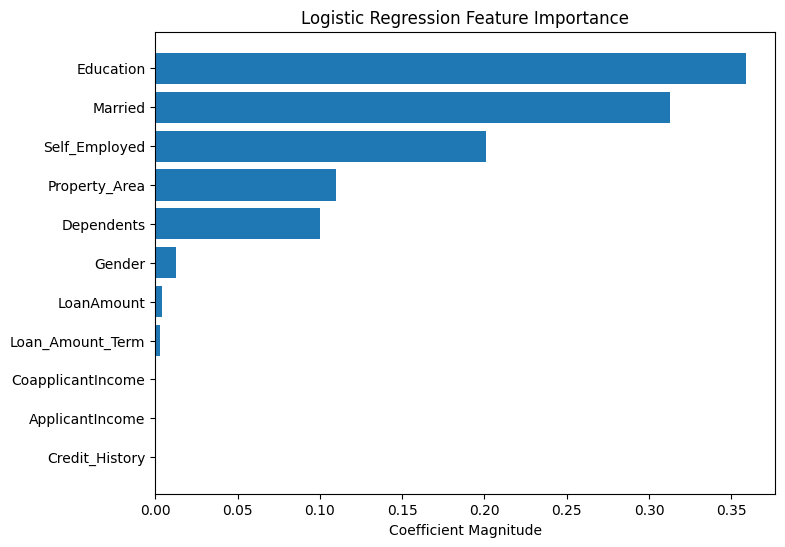

In [31]:
# feature importance
model = LR

importance = np.abs(model.coef_[0])

fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.xlabel("Coefficient Magnitude")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()